In [ ]:
!pip install wordcloud
!pip install - U spacy


In [1]:
import csv

#data manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#text packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import spacy
from bs4 import BeautifulSoup

#model preparation & selection
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")


# Import data

In [2]:
movie = "movies.csv"
movie_data = pd.read_csv(movie, header=0)
movie_data.columns = ["name", "comment", "label"]
print(movie_data.shape)
movie_data = movie_data.dropna(axis=0, how='any', inplace=False)
movie_data = movie_data.astype(str)
movie_data.head(), print(movie_data.shape)


(14050, 3)
(13735, 3)


(      name                                            comment   label
 0  juniper  Filmmakers should showcase Rampling’s indomita...  rotten
 1  juniper  Savilles directorial debut is solid just like ...   fresh
 2  juniper  It feels personal in a lot of the details and ...   fresh
 3  juniper  We've seen this a million times -- but not wit...   fresh
 4  juniper  Juniper takes some time to get where it is goi...   fresh,
 None)

In [3]:
game = "games.csv"
game_data = pd.read_csv(game, header=0)
game_data.columns = ["name", "comment", "label"]
print(game_data.shape)
game_data = game_data.dropna(axis=0, how='any', inplace=False)
game_data = game_data.astype(str)
game_data.head(), print(game_data.shape)


(11721, 3)
(11115, 3)


(  name                                            comment            label
 0  730  After  years playing it I didnt improve my ski...      Recommended
 1  730                                     I NOT CAN PLAY  Not Recommended
 2  730  Your team in every random competitive gamebrbr...      Recommended
 3  730  gtsee a guybrgtshoot himbrgtmiss every shotbrg...      Recommended
 4  730  This community is so nice i got a lot of tips ...      Recommended,
 None)

# Process data

In [4]:
contractions = {
    "aight": "alright",
    "ain't": "am not",
    "amn't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "daren't": "dare not",
    "daresn't": "dare not",
    "dasn't": "dare not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "d'ye": "do you",
    "e'er": "ever",
    "everybody's": "everybody is",
    "everyone's": "everyone is",
    "finna": "fixing to",
    "g'day": "good day",
    "gimme": "give me",
    "giv'n": "given",
    "gonna": "going to",
    "gon't": "go not",
    "gotta": "got to",
    "hadn't": "had not",
    "had've": "had have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'dn't've'd": "he would not have had",
    "he'll": "he will",
    "he's": "he is",
    "he've": "he have",
    "how'd": "how would",
    "howdy": "how do you do",
    "how'll": "how will",
    "how're": "how are",
    "I'll": "I will",
    "I'm": "I am",
    "I'm'a": "I am about to",
    "I'm'o": "I am going to",
    "innit": "is it not",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "may've": "may have",
    "methinks": "me thinks",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "must've": "must have",
    "needn't": "need not",
    "ne'er": "never",
    "o'clock": "of the clock",
    "o'er": "over",
    "ol'": "old",
    "oughtn't": "ought not",
    "'s": "is",
    "shalln't": "shall not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she shall",
    "she'll": "she will",
    "she's": "she has",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "somebody's": "somebody has",
    "somebody's": "somebody is",
    "someone's": "someone has",
    "someone's": "someone is",
    "something's": "something has",
    "something's": "something is",
    "so're": "so are",
    "that'll": "that shall",
    "that'll": "that will",
    "that're": "that are",
    "that's": "that has",
    "that's": "that is",
    "that'd": "that would",
    "that'd": "that had",
    "there'd": "there had",
    "there'd": "there would",
    "there'll": "there shall",
    "there'll": "there will",
    "there're": "there are",
    "there's": "there has",
    "there's": "there is",
    "these're": "these are",
    "these've": "these have",
    "they'd": "they had",
    "they'd": "they would",
    "they'll": "they shall",
    "they'll": "they will",
    "they're": "they are",
    "they're": "they were",
    "they've": "they have",
    "this's": "this has",
    "this's": "this is",
    "those're": "those are",
    "those've": "those have",
    "'tis": "it is",
    "to've": "to have",
    "'twas": "it was",
    "wanna": "want to",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd": "we would",
    "we'd": "we did",
    "we'll": "we shall",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'd": "what did",
    "what'll": "what shall",
    "what'll": "what will",
    "what're": "what are",
    "what're": "what were",
    "what's": "what has",
    "what's": "what is",
    "what's": "what does",
    "what've": "what have",
    "when's": "when has",
    "when's": "when is",
    "where'd": "where did",
    "where'll": "where shall",
    "where'll": "where will",
    "where're": "where are",
    "where's": "where has",
    "where's": "where is",
    "where's": "where does",
    "where've": "where have",
    "which'd": "which had",
    "which'd": "which would",
    "which'll": "which shall",
    "which'll": "which will",
    "which're": "which are",
    "which's": "which has",
    "which's": "which is",
    "which've": "which have",
    "who'd": "who would",
    "who'd": "who had",
    "who'd": "who did",
    "who'd've": "who would have",
    "who'll": "who shall",
    "who'll": "who will",
    "who're": "who are",
    "who's": "who has",
    "who's": "who is",
    "who's": "who does",
    "who've": "who have",
    "why'd": "why did",
    "why're": "why are",
    "why's": "why has",
    "why's": "why is",
    "why's": "why does",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd've": "you all would have",
    "y'all'dn't've'd": "you all would not have had",
    "y'all're": "you all are",
    "you'd": "you had",
    "you'd": "you would",
    "you'll": "you shall",
    "you'll": "you will",
    "you're": "you are",
    "you're": "you are",
    "you've": "you have",
    " u ": "you",
    " ur ": "your",
    " n ": "and"
}


def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x


In [5]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')


def preprocess_text(text):
    text = text.lower()

    text = cont_to_exp(text)

    # Remove HTML
    text = BeautifulSoup(text, 'lxml').get_text()
    
    # Remove Emails
    text = re.sub(
        r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', text)

    # # Remove urls
    text = re.sub(
        r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
    
    # Create a spaCy Doc object
    text = ' '.join(
        [t for t in text.split() if t not in STOP_WORDS])
    
    # Removal of special chars and punctuation
    text = re.sub('[^\w]', ' ', text)
    
    # Removing multiple spaces
    text =  ' '.join(text.split())
    return text


# Example usage
# data = {'comment': [
#     "We've this! An -- example <b>text</b> with an email@example.com and some punctuation!!!"]}
# test = pd.DataFrame(data)
movie_data['comment'] = movie_data['comment'].apply(preprocess_text)

game_data['comment'] = game_data['comment'].apply(preprocess_text)
# df = preprocess_text(text_data)
movie_data, game_data


(          name                                            comment   label
 0      juniper  filmmakers showcase rampling s indomitable pre...  rotten
 1      juniper  savilles directorial debut solid like script g...   fresh
 2      juniper  feels personal lot details production design e...   fresh
 3      juniper  seen million times charlotte rampling elevates...   fresh
 4      juniper  juniper takes time going invested odd couple f...   fresh
 ...        ...                                                ...     ...
 14043    delta  tide political correctness delta chart unsafe ...   fresh
 14044    delta  film infuential prescient ever signature work ...   fresh
 14045    delta  sachs sustain cinematic promise deltais early ...   fresh
 14046    delta  intimate gay drama complex relationship white ...  rotten
 14049   damien  compelling drama suffering servanthood ministr...   fresh
 
 [13735 rows x 3 columns],
          name                                            comment  \
 0

# Explore data before training

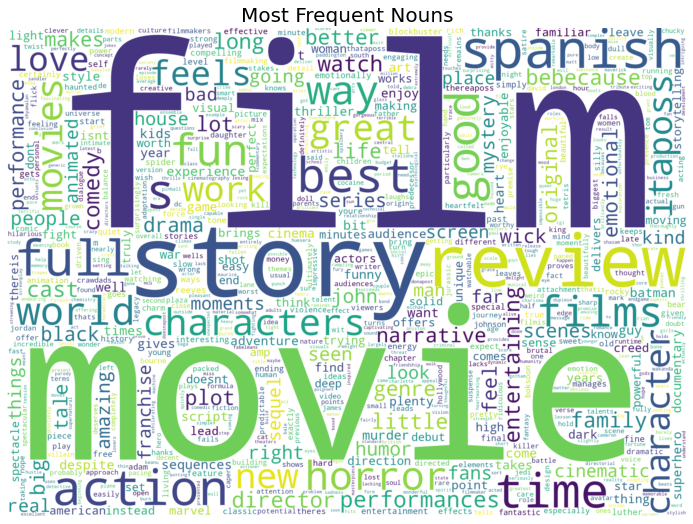

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
text = ' '.join(movie_data['comment'])
text = text.split()
x = ' '.join(text[:20000])
wordcloud_noun = WordCloud(width=2500, height=1800,
                           max_words=800,
                           background_color='white', collocations=False,
                           normalize_plurals=False).generate(x)
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud_noun, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Nouns', fontsize=20)
plt.show()


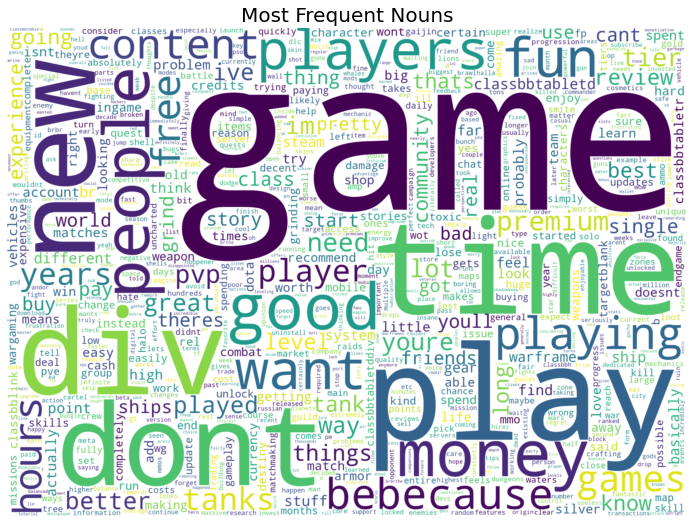

In [7]:
%matplotlib inline
text = ' '.join(game_data['comment'])
text = text.split()
x = ' '.join(text[:20000])
wordcloud_noun = WordCloud(width=2500, height=1800,
                           max_words=800,
                           background_color='white', collocations=False,
                           normalize_plurals=False).generate(x)
plt.figure(figsize=(18, 9))
plt.imshow(wordcloud_noun, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Nouns', fontsize=20)
plt.show()


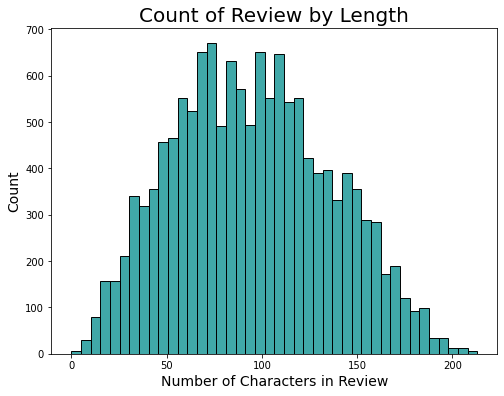

In [8]:
new_movie_data_df = movie_data.copy()

new_movie_data_df['Text_Length'] = new_movie_data_df['comment'].str.len()

plt.figure(figsize=(8, 6))
ax = sns.histplot(x=new_movie_data_df['Text_Length'], color='darkcyan')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Number of Characters in Review', fontsize=14)
plt.title('Count of Review by Length', fontsize=20)
plt.show()


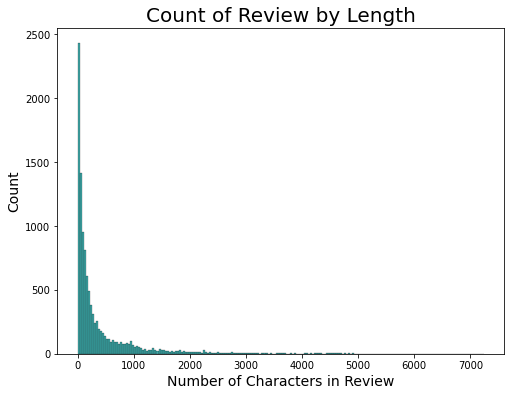

In [9]:
new_game_data_df = game_data.copy()

new_game_data_df['Text_Length'] = new_game_data_df['comment'].str.len()

plt.figure(figsize=(8, 6))
ax = sns.histplot(x=new_game_data_df['Text_Length'], color='darkcyan')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Number of Characters in Review', fontsize=14)
plt.title('Count of Review by Length', fontsize=20)
plt.show()


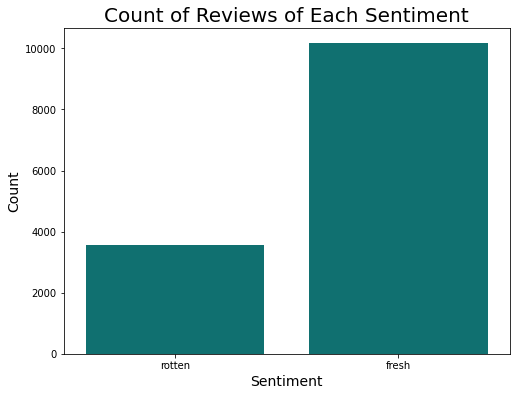

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=new_movie_data_df['label'], color='teal')
#plt.xlim(0,12000)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)
plt.title('Count of Reviews of Each Sentiment', fontsize=20)
plt.show()


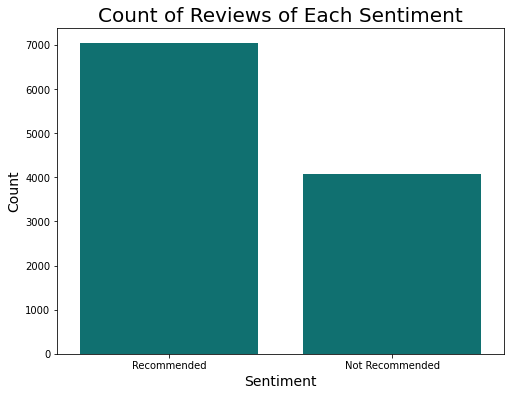

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=new_game_data_df['label'], color='teal')
#plt.xlim(0,12000)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)
plt.title('Count of Reviews of Each Sentiment', fontsize=20)
plt.show()


In [12]:
print('There are '+ str(movie_data[movie_data['label']=='fresh'].shape[0])+' positive reviews.')
print('There are '+ str(movie_data[movie_data['label']!='fresh'].shape[0]) + ' negative reviews.')

There are 10169 positive reviews.
There are 3566 negative reviews.


In [13]:
print('There are '+ str(game_data[game_data['label']=='Recommended'].shape[0])+' positive reviews.')
print('There are '+ str(game_data[game_data['label']!='Recommended'].shape[0]) + ' negative reviews.')

There are 7040 positive reviews.
There are 4075 negative reviews.


# Train model

In [14]:
labels = ["fresh", "Recommended"]
vecs = [TfidfVectorizer(stop_words='english', min_df=7,
                      ngram_range=(1, 2), max_df=0.8),
        TfidfVectorizer(stop_words='english', min_df=7,
                        ngram_range=(1, 2), max_df=0.8)]
X_movie_data = vecs[0].fit_transform(movie_data['comment'])
movie_data['sentiment_score'] = np.where(
    movie_data['label'] == labels[0], 1, 0)
Y_movie_data = movie_data['sentiment_score']

X_game_data = vecs[1].fit_transform(game_data['comment'])
game_data['sentiment_score'] = np.where(
    game_data['label'] == labels[1], 1, 0)
Y_game_data = game_data['sentiment_score']



In [15]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X = scaler.fit_transform(X_movie_data)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y_movie_data, test_size=0.2, random_state=42, stratify=Y_movie_data)
clf_movie = SVC(kernel='rbf', probability=True, random_state=42).fit(X_train, y_train)
y_pred = clf_movie.predict(X_test)
clf_score = clf_movie.score(X_test, y_test)
print("Movie")
print('The accuracy for the kernel SVC model is '+str(clf_score))
clf_f1score = f1_score(y_test, y_pred)
print(f'The F1 for the model is '+str(clf_f1score), end="\n\n")


Movie
The accuracy for the kernel SVC model is 0.8969785220240262
The F1 for the model is 0.9345967182805639



In [16]:
scaler = MaxAbsScaler()
X = scaler.fit_transform(X_game_data)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y_game_data, test_size=0.2, random_state=42, stratify=Y_game_data)
clf_game = SVC(kernel='rbf', probability=True,
          random_state=42).fit(X_train, y_train)
y_pred = clf_game.predict(X_test)
clf_score = clf_game.score(X_test, y_test)
print("Game")
print('The accuracy for the kernel SVC model is '+str(clf_score))
clf_f1score = f1_score(y_test, y_pred)
print(f'The F1 for the model is '+str(clf_f1score), end="\n\n")


Game
The accuracy for the kernel SVC model is 0.8124156545209177
The F1 for the model is 0.8627838104639685



# Save model and vector

In [17]:
import joblib
joblib.dump(clf_movie, f"{movie.split('.')[0]}.pkl"), joblib.dump(
    vecs[0], f"{movie.split('.')[0]+'_vec'}.pkl")



(['movies.pkl'], ['movies_vec.pkl'])

In [18]:
joblib.dump(clf_game, f"{game.split('.')[0]}.pkl"), joblib.dump(
    vecs[1], f"{game.split('.')[0]+'_vec'}.pkl")


(['games.pkl'], ['games_vec.pkl'])

In [19]:
game_estimator = joblib.load(f"{game.split('.')[0]}.pkl")
game_pkl_vec = joblib.load(f"{game.split('.')[0]+'_vec'}.pkl")

movie_estimator = joblib.load(f"{movie.split('.')[0]}.pkl")
movie_pkl_vec = joblib.load(f"{movie.split('.')[0]+'_vec'}.pkl")
# Test on a new sentence


def test(clf, vec, text):
    text = preprocess_text(text)
    test_vectorized_sentence = vec.transform([text])
    prediction = clf.predict_proba(
                    test_vectorized_sentence)
    output = np.argmax(prediction[0])
    print(output, "---> ", prediction[0][output])


test(movie_estimator, movie_pkl_vec,
     "This movie is not that as well as I think before, and I don't recommend you to watch")


0 --->  0.6710888283556937


In [21]:
test(movie_estimator, movie_pkl_vec,
     "It is the laziest possible version of a Mario movie, and for most viewers, young and old, that’ll be totally acceptable.")


0 --->  0.6601803353707802


In [22]:
test(movie_estimator, movie_pkl_vec,
     "This is a movie for adults, children, teens, and anyone that ever rocked with them Mario Bros.")


1 --->  0.7427445540083623


In [32]:
test(game_estimator, game_pkl_vec,
     "First My playing hours are like x because I also played a lot of houres outside steambrI am a rank  and play all the factions  I also have been a very good customer of gaijin as I have bought a lot in their store over the years And since I have invested so much time and money in it I would like to give a positive review But unfortunately I decided not to do that  And also have decided to uninstall this game At a given moment you are just done and all the trust is gonebrbrIt is a beautiful game but Devs are just the big problem They prefer to make new content instead of fixing old problemsbrAfter so many years I have lost all confidence in them They almost never listen to criticism from their fans and always think they know better They forget that the fans want to improve the game with their criticism but are often treated as Gaijins enemybrbrThere are so many problems that it is too long for a review but here is a list with the most importantbrbr BR compression Each vehicle has a battlerating like     ect A battlerating is an indication of how good a vehicle is and what it can encounter The maximum battlerating in a match can be  higher to  lower than your own vehicle Which means that you can sit between the highest BR and the lowest BR uptier and downtierbrNow the vehicles are too close together in terms of BR so compression Which means that some vehicles dominate heavily and some do not have a chance at all when they come  against each other in a match Gaijin does not want to solve this problem because they want everyone to find a match quickly this is my biggest problem with this gamebrbr Gaijin censorship Gaijin does not like criticism Post on their form that are critical and viewed by enough players just disappear Gaijin denies for example that it was possible to cheat in their game When a youtuber proved that it was possible Gaijin wanted to copyright strike against this person or put the Realistich game mode to Arcade As a kind of punishment for the player or something I have no idea why Gaijin behaved rather childishbrbr Reporting a bug During the years I reported all the bug that I found to gaijin I have send replays and information From kg bombs that do no damage tanks shot that disappeared in the air to planes that were shot in  and keeps flying smoothly I have seen everything over the years Fortunately there are never many bugs so that is goodbrBut I have never received any answers from Gaijin The only thing that is done is that your report gets closed completely ignored or can no longer be found disappears It looks more like Gaijin sees you as a burden instead of helpbrbrbrThere are many other problems in this game such as your tank shots that are absorbed into the Optics of the opponents tanks and do no damage or pay to win tanks like the is brbrBut i have to stop to keep the review a little short I close it here brWarthunder quotcanquot  become a much better game than it is now There are too few players online to earn money so gaijin wants to pull as much money as they can from the remaining players as possible instead of recognizing problems and solving them")


1 --->  0.5480129785468785
